In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib

Using matplotlib backend: TkAgg


In [2]:
data = pd.read_json('data/nepali-movies.json')

In [3]:
data.head()

,genre,imdb_url,plot,rating,runtime,title,votes,year
0,"Drama, Romance",https://www.imdb.com/title/tt6944688/?ref_=adv...,"A Man stalks a girl, after while they fall in ...",8.2,138 min,A Mero Hajur 2,164.0,2017
1,"Comedy, Drama",https://www.imdb.com/title/tt7229666/?ref_=adv...,Chhakka Panja 2 continues with new story of Ra...,6.8,138 min,Chhakka Panja 2,190.0,2017
2,Comedy,https://www.imdb.com/title/tt8393764/?ref_=adv...,When she learns about the worst condition of t...,6.2,None,Chhakka Panja 3,52.0,2018
3,"Comedy, Drama",https://www.imdb.com/title/tt6580708/?ref_=adv...,"Dhanapati,a poor man suffering from high pover...",8.4,None,Dhanapati,46.0,2017
4,"Drama, Romance",https://www.imdb.com/title/tt8475990/?ref_=adv...,An romantic relationship between a celebrity a...,NaN,None,A Mero Hajur 3,NaN,2019


# Genre Analysis

In [26]:
data['genre'].value_counts()

Drama                            125
Short, Drama                      56
Drama, Romance                    40
Romance                           37
Documentary                       37
Documentary, Short                34
Short                             27
Action                            19
Comedy                            16
Comedy, Drama                     16
Short, Music                      14
Short, Musical                    13
Action, Drama                     10
Musical                            8
Drama, Family                      7
Thriller                           6
Short, Drama, Family               6
Documentary, Short, Drama          5
Documentary, Short, Adventure      5
Documentary, Short, Biography      4
Comedy, Drama, Romance             4
Documentary, Adventure             4
Drama, History                     4
Crime                              4
Drama, Musical                     4
Family                             4
Biography                          3
D

In [27]:
figsize = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = [15, 10]

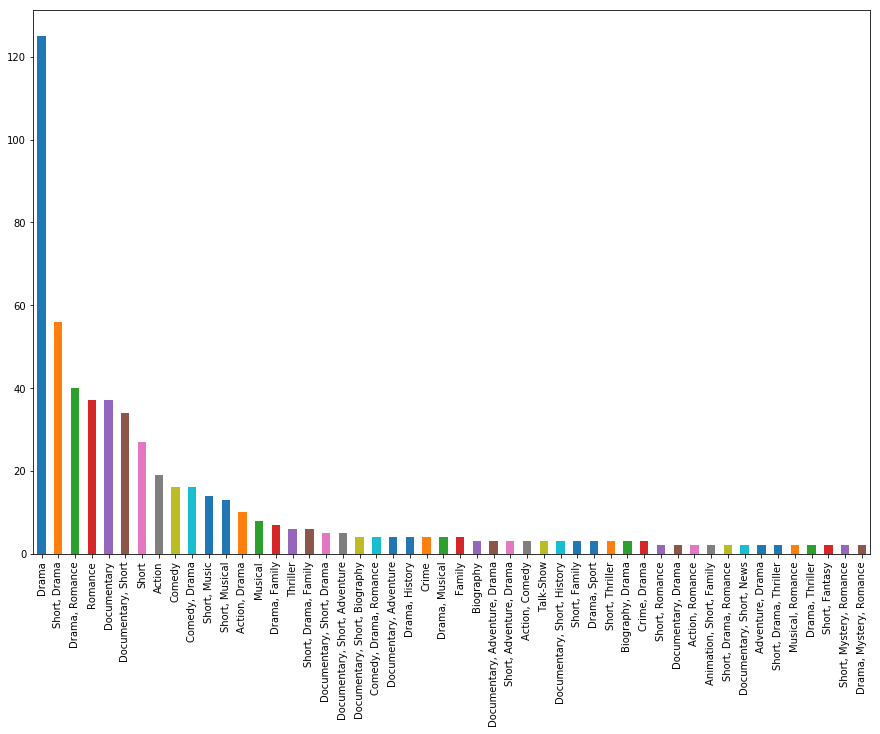

In [28]:
data['genre'].value_counts()[:50].plot('bar')

#### Simple Genre
The original data consists of multiple genre for each movie. So, here I break down them into simple (and common) genres to make the analysis efficient.

In [31]:
genre_list = ['drama', 'romance', 'comedy', 'biography', 'documentary', 'crime', 'thriller', 'action', 'music']

In [32]:
count_map = {}
for genre in genre_list:
    count_map[genre] = len(data['genre'].dropna().apply(lambda x : genre if genre in x.lower() else None).dropna())

In [35]:
count_map

{'drama': 334,
 'romance': 107,
 'comedy': 50,
 'biography': 19,
 'documentary': 110,
 'crime': 16,
 'thriller': 19,
 'action': 48,
 'music': 54}

In [36]:
types = np.array(list(count_map.keys()))
types

array(['drama', 'romance', 'comedy', 'biography', 'documentary', 'crime',
       'thriller', 'action', 'music'], dtype='<U11')

In [37]:
counts = np.array(list(count_map.values()))
counts

array([334, 107,  50,  19, 110,  16,  19,  48,  54])

In [39]:
#types[np.argsort(counts)[::-1]]

Text(0.5, 1.0, 'Nepali Movie Genre')

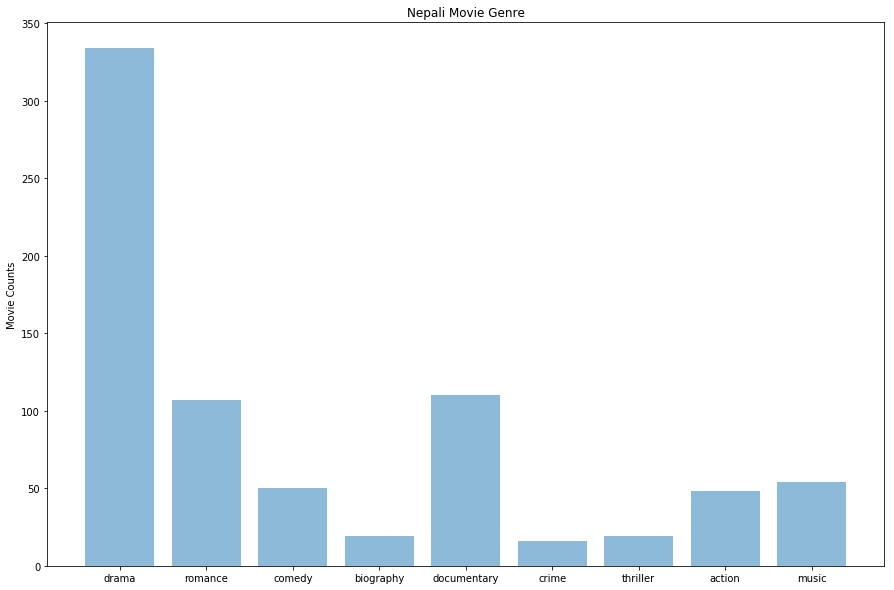

In [40]:
y_pos = np.arange(len(types))
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, types)
plt.ylabel('Movie Counts')
plt.title('Nepali Movie Genre')

In [51]:
data['rating'].describe()

count    225.000000
mean       7.647556
std        1.078402
min        2.900000
25%        7.000000
50%        7.800000
75%        8.400000
max       10.000000
Name: rating, dtype: float64

In [60]:
sns.boxplot(data=data[['rating', 'title']])

# Year and Rating

In [80]:
df = data[data['rating'].notnull()]

In [81]:
df = df[['rating', 'year']]

In [125]:
figsize = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = [20, 10]

In [133]:
df_2 = df.groupby('year').mean()
df_2.reset_index(inplace=True)
df_2

,year,rating
0,1964,9.000000
1,1966,9.700000
2,1973,8.600000
3,1977,9.000000
4,1978,8.500000
5,1983,6.800000
6,1984,8.350000
7,1985,7.100000
8,1987,7.750000
9,1989,8.100000


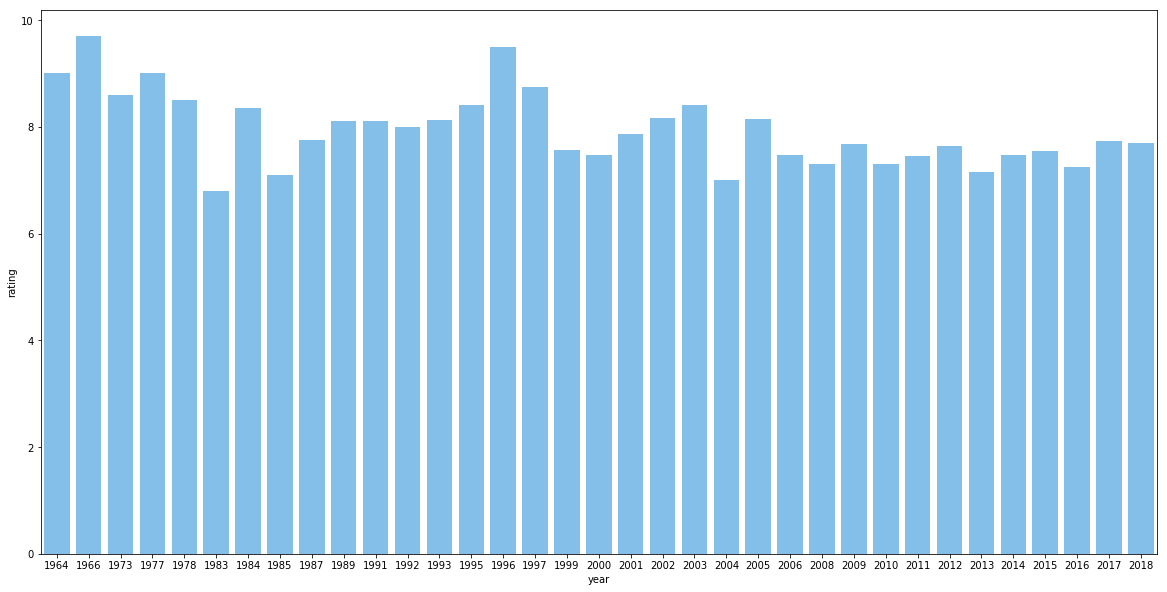

In [131]:
sns.barplot(x='year', y='rating', data=df_2, color='#73C2FB')

In [144]:
df[df['year'] == 1966]

,rating,year
106,9.7,1966


In [145]:
df[df['year'] == 1996]

,rating,year
72,9.5,1996


In [146]:
data['rating'].mean()

7.647555555555556

#### thoughts
It seems there are no drastic fluctuations in ratings based on year. The average rating till 2018 is **7.6**.
The highest ratings seem to in the year 1966 and 1996.
But that doesn't mean they are good representation for the analysis since **1996** has only one non-null rating value while **1966** has only a single movie in the database.